In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots

2026-01-22 13:25:51.119 | INFO     | iraklis7_linrg.config:<module>:18 - PROJ_ROOT path is: /Users/iraklis/git/iraklis7_linrg


### Load the data

In [3]:
input_path: Path = config.RAW_DATA_DIR / config.DATASET
plot_path: Path = config.FIGURES_DIR / config.INITIAL_PLOT

data = config.read_data(input_path)
data = config.read_data(input_path)
if data is None:
    raise ValueError("read_data failed - data is None")

### Inspect the data

In [4]:
data.sample(5)

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Τιμή,Αρχική Τιμή
100,18860143,112,2.0,3.0,0,1.0,1973.0,NaN,250000,NaN
57,16779589,101,5.0,NaN,1,1.0,2002.0,NaN,250000,NaN
26,17671885,114,3.0,3.0,0,0.0,1970.0,2024.0,165000,NaN
23,18624226,111,4.0,NaN,1,1.0,1975.0,2009.0,285000,NaN
15,19021955,117,5.0,NaN,1,0.0,1992.0,NaN,265000,NaN


In [5]:
data.info()


<class 'pandas.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Κωδικός Συστήματος  121 non-null    int64  
 1   Εμβαδόν             121 non-null    int64  
 2   Όροφος              116 non-null    float64
 3   Σύνολο ορόφων       66 non-null     float64
 4   Ασανσέρ             121 non-null    int64  
 5   Θέα                 107 non-null    float64
 6   Έτος κατασκευής     118 non-null    float64
 7   Έτος ανακαίνισης    38 non-null     float64
 8   Τιμή                121 non-null    int64  
 9   Αρχική Τιμή         3 non-null      float64
dtypes: float64(6), int64(4)
memory usage: 9.6 KB


In [6]:
data.isna().sum()

Κωδικός Συστήματος      0
Εμβαδόν                 0
Όροφος                  5
Σύνολο ορόφων          55
Ασανσέρ                 0
Θέα                    14
Έτος κατασκευής         3
Έτος ανακαίνισης       83
Τιμή                    0
Αρχική Τιμή           118
dtype: int64

In [7]:
data.describe()

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Τιμή,Αρχική Τιμή
count,1.210000e+02,121.000000,116.000000,66.000000,121.000000,107.000000,118.00000,38.000000,121.000000,3.000000
mean,1.819868e+07,122.479339,3.758621,5.090909,0.876033,0.822430,1982.79661,2017.684211,323793.388430,316333.333333
std,8.477865e+05,27.703219,2.120790,1.786507,0.330914,0.383949,21.40595,11.130929,134560.142523,127162.625536
min,1.375765e+07,100.000000,1.000000,2.000000,0.000000,0.000000,1929.00000,1980.000000,110000.000000,179000.000000
25%,1.778044e+07,105.000000,2.000000,4.000000,1.000000,1.000000,1969.25000,2015.750000,230000.000000,259500.000000
50%,1.843669e+07,115.000000,4.000000,5.000000,1.000000,1.000000,1978.00000,2022.500000,295000.000000,340000.000000
75%,1.874946e+07,127.000000,5.000000,6.000000,1.000000,1.000000,1992.75000,2025.000000,390000.000000,385000.000000
max,1.907109e+07,310.000000,8.000000,9.000000,1.000000,1.000000,2025.00000,2025.000000,850000.000000,430000.000000


In [8]:
data.select_dtypes('number')

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Τιμή,Αρχική Τιμή
0,18055522,130,1.0,4.0,1,1.0,1988.0,2022.0,245000,NaN
1,17845458,104,2.0,NaN,1,1.0,1978.0,NaN,171000,179000.0
2,18396501,132,7.0,7.0,1,1.0,1976.0,2000.0,400000,NaN
3,18652593,117,6.0,NaN,1,1.0,2024.0,NaN,370000,NaN
4,18433163,105,5.0,7.0,1,1.0,1972.0,NaN,229000,NaN
...,...,...,...,...,...,...,...,...,...,...
116,17182830,106,2.0,2.0,0,0.0,1992.0,NaN,200000,NaN
117,19067951,117,2.0,NaN,1,0.0,1977.0,2020.0,285000,NaN
118,16716686,117,6.0,NaN,1,1.0,2024.0,NaN,320000,NaN
119,17389167,105,6.0,NaN,1,NaN,2024.0,NaN,365000,NaN


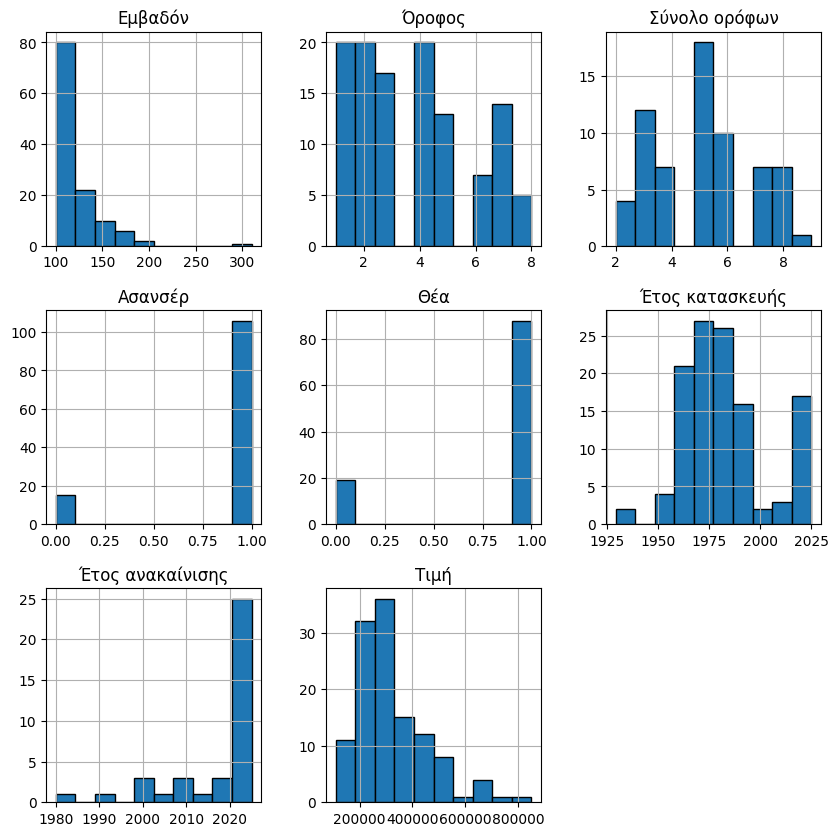

In [9]:
data_s = data.drop(['Κωδικός Συστήματος', 'Αρχική Τιμή'], axis=1)
plots.do_hist(data_s, 10, 10, True)